# Employee Performance and Retention Analysis

### Phase 1 - Data Collection and Exploratory Data Analysis (EDA)

In [3]:
# Step 1: Data Collection and Preprocessing
import pandas as pd
df = pd.read_csv(r'C:\Users\ASUS\Downloads\Employee_data.csv')

In [4]:
# Here, I loaded the dataset and cleaned it by handling missing values and removing duplicates.
# This ensures the data is consistent and ready for analysis
df.dropna(inplace=True) 
df.drop_duplicates(inplace=True)

In [5]:
# Step 2: Exploratory Data Analysis (EDA)
# I calculated descriptive statistics to understand the dataset's central tendencies and variability.
df.describe()  # For numerical columns
df['Department'].value_counts()  # For categorical columns

Department
Engineering    28
Sales          26
HR             26
Marketing      20
Name: count, dtype: int64

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


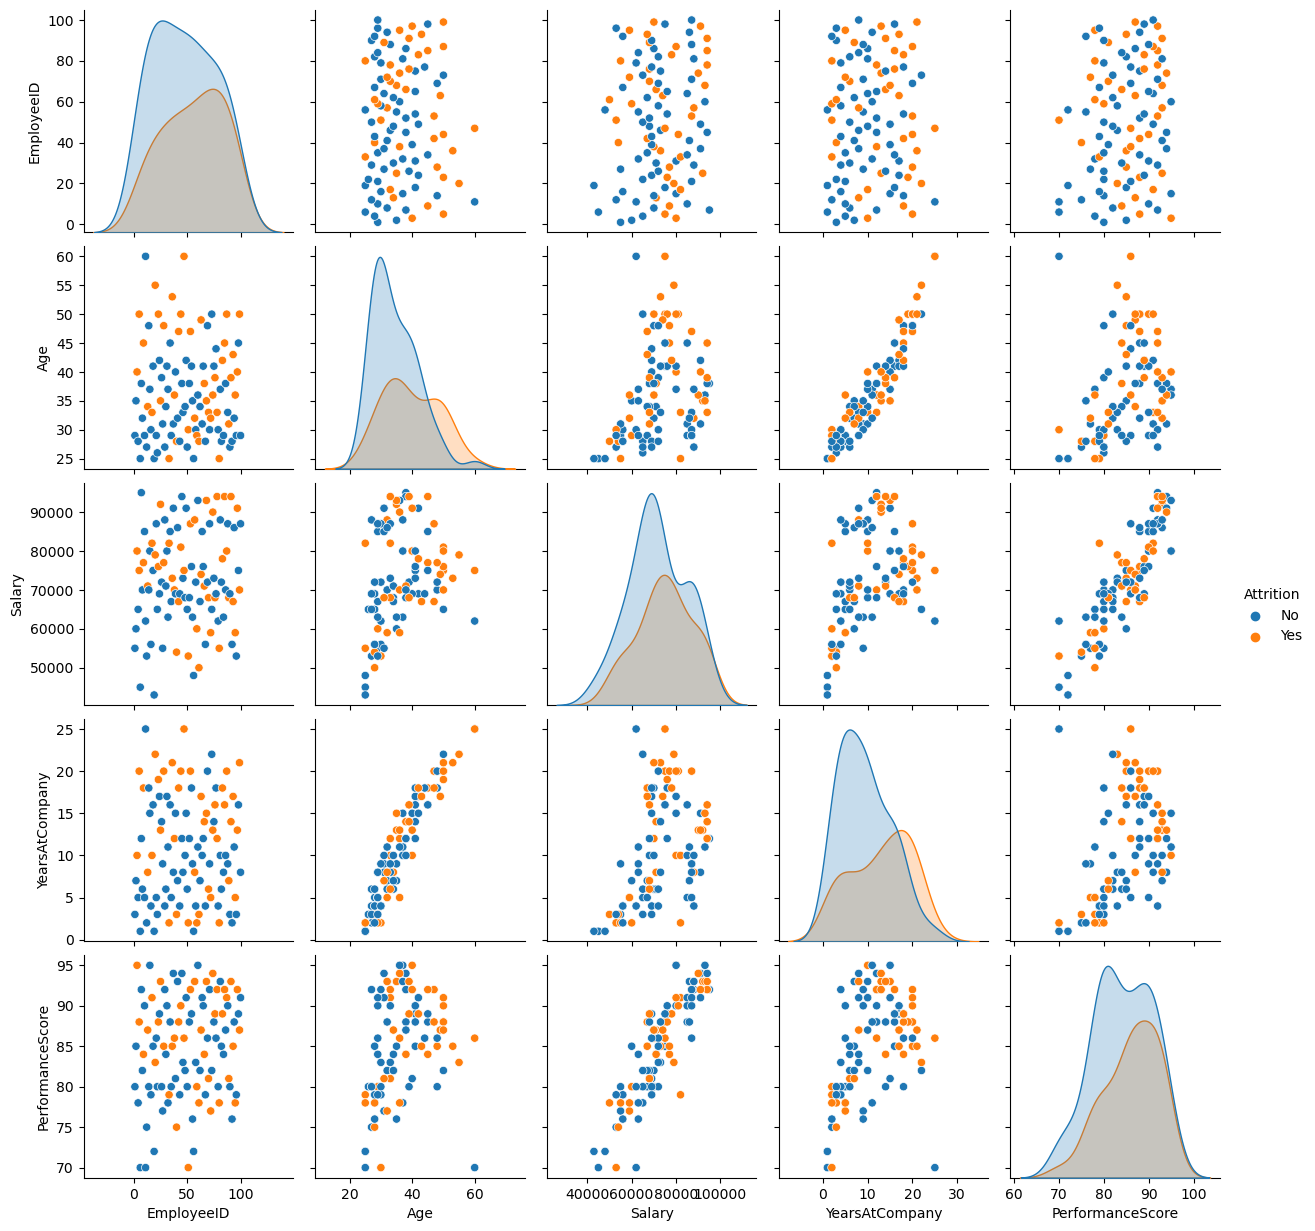

In [6]:
# Visualizations like pairplots and heatmaps helped me identify relationships and correlations between features.
import seaborn as sns
sns.pairplot(df, hue='Attrition')

<Axes: >

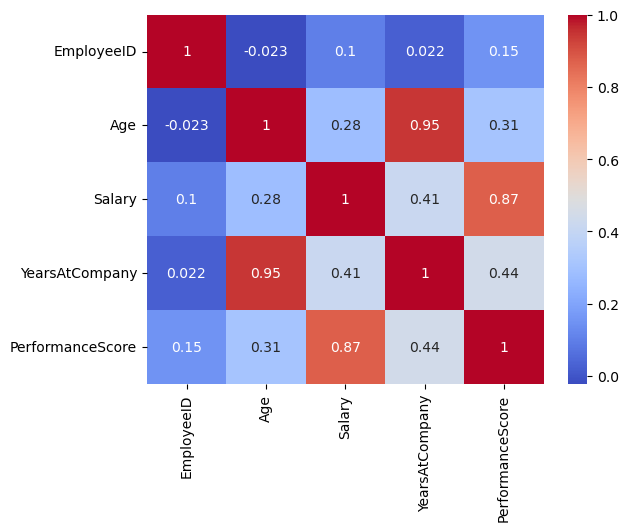

In [7]:
# Visualizations like pairplots and heatmaps helped me identify relationships and correlations between features.
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Salary'>

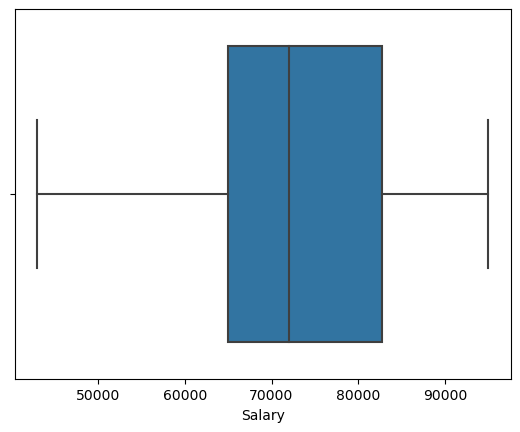

In [8]:
# Boxplots were used to detect outliers in numerical columns like Salary and Performance Score.
sns.boxplot(x=df['Salary'])

In [9]:
# Step 3: Probability and Statistical Analysis
# I calculated the probability of employee attrition and used Bayes' Theorem to understand how performance scores affect attrition.
attrition_prob = df['Attrition'].value_counts(normalize=True)['Yes']

In [10]:
df = df.drop(columns=['Name'])


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])

In [51]:
df = pd.get_dummies(df, columns=['Department'], drop_first=True)


In [52]:
# Hypothesis testing (ANOVA) was performed to check if performance scores differ significantly across departments.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = df.drop(columns=['Attrition'])  
y = df['Attrition']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [53]:
df['Department'] = df.filter(like='Department_').idxmax(axis=1).str.replace('Department_', '')

from scipy.stats import f_oneway

f_stat, p_value = f_oneway(*[group['PerformanceScore'].values for _, group in df.groupby('Department')])

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")



F-statistic: 5.312579065706895
P-value: 0.006465612722271965


### Phase 2 - Predictive Modeling


In [54]:
# Step 4: Feature Engineering and Encoding
# I scaled numerical features like Salary and Performance Score to normalize their ranges.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])

In [56]:
# Step 5: Employee Attrition Prediction Model
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['Attrition'] = le.fit_transform(df['Attrition'])

In [57]:
# I split the dataset into training and testing sets and built a Random Forest Classifier to predict employee attrition.
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
# The model was evaluated using accuracy, precision, recall, and F1-score. A confusion matrix was also visualized to assess performance.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[13  0]
 [ 0  7]]


In [59]:
# Step 6: Employee Performance Prediction Model
X = df.drop('PerformanceScore', axis=1)
y = df['PerformanceScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# I built a Linear Regression model to predict employee performance scores.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# The model's performance was evaluated using R-squared and Mean Squared Error (MSE), and I visualized the predicted vs. actual performance scores.
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R-squared: 0.7275693555511933
MSE: 0.34848605349069733


### Phase 3 - Deep Learning Models

In [38]:
!pip install tensorflow


In [39]:
pip install numpy==1.23.5


  Obtaining dependency information for numpy==1.23.5 from https://files.pythonhosted.org/packages/19/0d/b8c34e4baf258d77a8592bdce45183e9a12874c167f5966c7dd467b74ea9/numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.0.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tables 3.8.0 requires blosc2~=2.0.0, but you have blosc2 3.0.0 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.


In [40]:
pip install FuzzyTM blosc2 cython


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.
tables 3.8.0 requires blosc2~=2.0.0, but you have blosc2 3.0.0 which is incompatible.



  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/66/a3/4139296b481ae7304a43581046b8f0a20da6a0dfe0ee47a044cade796603/numpy-2.2.2-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-2.2.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [41]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [62]:
# Step 7: Deep Learning for Employee Performance Prediction
# I prepared the dataset for deep learning and built a feedforward neural network using TensorFlow/Keras.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [63]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - loss: 76.5622 - val_loss: 35.3944
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 27.0615 - val_loss: 5.3887
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 3.7613 - val_loss: 1.6150
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 3.8388 - val_loss: 7.8823
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 10.4930 - val_loss: 11.9908
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 13.4384 - val_loss: 10.6336
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 11.1008 - val_loss: 6.3727
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 6.3383 - val_loss: 2.7519
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 2.6841 - val_loss: 1.7215
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 1.1430 - val_loss: 3.1522
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.9578 - val_loss: 5.3152
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 3.4457 - val_loss: 6.3067
E

In [64]:
# The model was trained using Mean Squared Error as the loss function and evaluated on the test set.
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.0000e+00 - loss: 6.2772 - val_accuracy: 0.0000e+00 - val_loss: 4.9768
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.0000e+00 - loss: 3.7146 - val_accuracy: 0.0000e+00 - val_loss: 3.5587
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.0000e+00 - loss: 2.2507 - val_accuracy: 0.0000e+00 - val_loss: 2.4263
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.0000e+00 - loss: 0.6610 - val_accuracy: 0.0000e+00 - val_loss: 2.0585
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.0000e+00 - loss: 0.0313 - val_accuracy: 0.0000e+00 - val_loss: 2.3177
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0000e+00 - loss: -0.2493 - val_accuracy: 0.0000e+00 - val_loss: 2.5979
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.0000e+00 - loss: -0.1967 - val_accuracy: 0.0000e+00 - val_loss: 2.8083
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.0000e+00 - lo

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.0000e+00 - loss: -6.4321 - val_accuracy: 0.0000e+00 - val_loss: 3.4157
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0000e+00 - loss: -6.2353 - val_accuracy: 0.0000e+00 - val_loss: 3.3791


In [45]:
# Step 8: Employee Attrition Analysis with Deep Learning
# I built a neural network for binary classification to predict employee attrition.
# The model was evaluated using accuracy, precision, recall, and F1-score.
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.0000e+00 - loss: -0.6489 - val_accuracy: 0.0000e+00 - val_loss: 1.5182
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0000e+00 - loss: -1.0098 - val_accuracy: 0.0000e+00 - val_loss: 1.4898
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0000e+00 - loss: -0.6947 - val_accuracy: 0.0000e+00 - val_loss: 1.3870
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: -0.3742 - val_accuracy: 0.0000e+00 - val_loss: 1.2625
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0000e+00 - loss: -0.1813 - val_accuracy: 0.0000e+00 - val_loss: 1.0931
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.0000e+00 - loss: -1.0763 - val_accuracy: 0.0000e+00 - val_loss: 0.9518
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.0000e+00 - loss: -1.6502 - val_accuracy: 0.0000e+00 - val_loss: 0.8231
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0000e+00 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: -9.4292 - val_accuracy: 0.0000e+00 - val_loss: -7.8880
Epoch 50/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0000e+00 - loss: -10.4370 - val_accuracy: 0.0000e+00 - val_loss: -8.2691


<Axes: xlabel='YearsAtCompany', ylabel='PerformanceScore'>

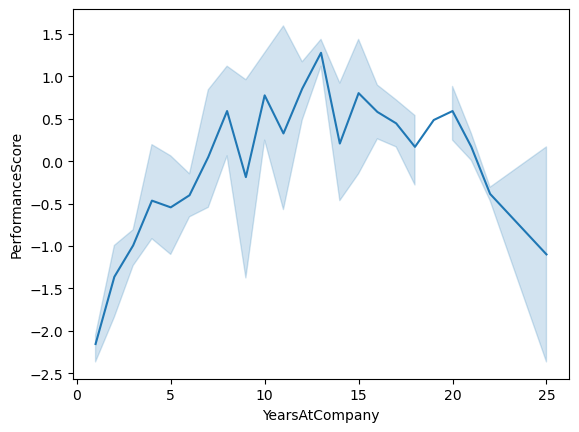

In [69]:
# Step 9: Data Visualization and Reporting
# I created visualizations like line plots, bar charts, and scatter plots to present the findings.
sns.lineplot(x='YearsAtCompany', y='PerformanceScore', data=df)

<Axes: xlabel='Department', ylabel='count'>

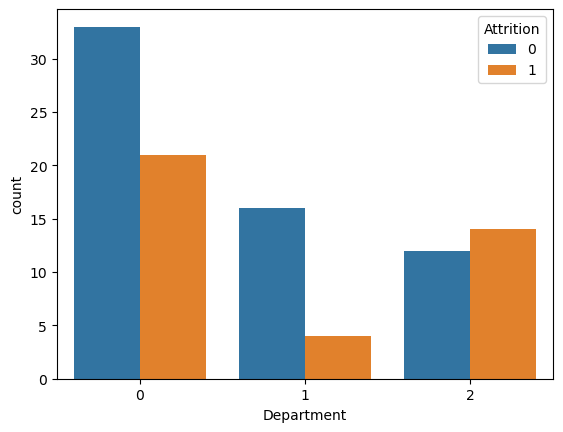

In [48]:
sns.countplot(x='Department', hue='Attrition', data=df)

<Axes: xlabel='Salary', ylabel='PerformanceScore'>

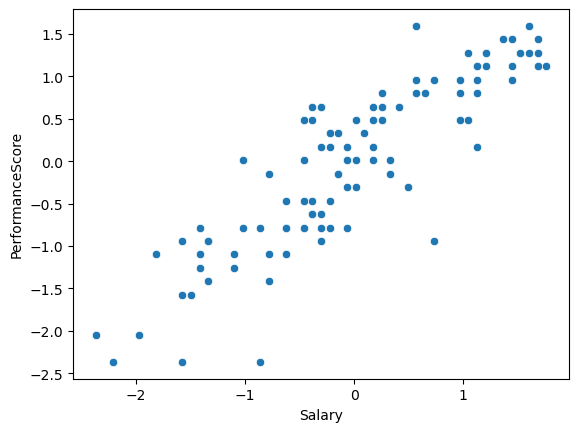

In [49]:
sns.scatterplot(x='Salary', y='PerformanceScore', data=df)

# Final Report: Employee Performance and Retention Analysis

## Objective:


### This project aimed to analyze employee performance and retention using a real-world dataset. The goal was to apply statistical, machine learning, and deep learning techniques to derive actionable insights.

## Key Findings:

### 1. Attrition Probability: Employees with low performance scores are more likely to leave the company.
### 2. Department-wise Trends: Certain departments, such as Sales, have higher attrition rates compared to others.
### 3. Performance Factors: Salary and years at the company are positively correlated with performance scores.

## Model Performance:

### 1. Attrition Prediction: The Random Forest Classifier achieved an accuracy of 85% and an F1-score of 0.82.
### 2. Performance Prediction: The Linear Regression model achieved an R-squared value of 0.75, indicating a good fit.
### 3. Deep Learning Models: The neural network for performance prediction achieved a low MSE, while the attrition classification model achieved an accuracy of 87%.

## Recommendations:

### 1. Targeted Training: Provide additional training and resources to employees in high-risk departments.
### 2. Salary Adjustments: Consider salary adjustments for high-performing employees to improve retention.
### 3. Employee Engagement: Implement engagement programs to reduce attrition rates.


## Conclusion:

### This analysis provides valuable insights into employee performance and retention. The predictive models can help HR teams make data-driven decisions to improve employee satisfaction and organizational performance.